 Predicting Stock Market Prices Using a Recurrent Neural Network
> There is a common belief that market movements are predictable using a number of technical indicators and chart patterns. If such signals do exhibit these fortune-telling properties, they should be detectable by a deep learning neural network and exploitable. In this post, we will examine these possibilities by designing a recurrent neural network in keras-tensorflow and see just how much money we can make.


- toc: true
- branch: master
- author: Michael Hotaling
- badges: true
- comments: true
- categories: [jupyter, matplotlib,python, recurrent neural network, machine learning]
- hide: false
- image: images/lstm.png
- show_image: true
- permalink: /stock_market_rnn/
- hide_binder_badge: false
- hide_colab_badge: false



In [1]:
#hide
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.dates as mdates

In [2]:
def load_stock_data(ticker, 
                    start = "1900-01-01", 
                    end = datetime.today().strftime("%Y-%m-%d"), 
                    interval = '1d'):
    
    # Convert string time to datetime
    start = datetime.strptime(start, "%Y-%m-%d")
    end = datetime.strptime(end, "%Y-%m-%d")
    
    # Calculate second since epoch
    start = int((start - datetime(1970,1,1)).total_seconds())
    end = int((end - datetime(1970,1,1)).total_seconds())
    
    # I like to format my urls like this, it feels cleaner
    # The new lines add which spaces, so that's what replace is for
    url = f"https://query1.finance.yahoo.com/v7/finance/download/\
            {ticker}?\
            period1={start}&\
            period2={end}&\
            interval={interval}&\
            events=history&\
            includeAdjustedClose=true".replace(" ","")
    

    return (pd.read_csv(url)
            .astype({'Date':'datetime64'})
            .set_index('Date')
           )

In [3]:
ticker = "SPY"
df = load_stock_data(ticker)

In [4]:
def candle_plotter(df, logy = False, grid =True):
    fig, ax = plt.subplots(figsize=(16,9))
    
    # Generate a psuedo plot for overlay
    ax.plot(df.index, df.Close, alpha = 0)
    
    if logy:
        ax.set_yscale('log')
    
    start, end = ax.get_xlim()
    spacing = ((end-start)/len(df))/2
    
    for ind, row in df.iterrows():
        color = 'green'
        if row['Close'] < row['Open']:
            color = 'red'
        ind = mdates.date2num(ind)
        rect = patches.Rectangle((ind, row['Open']), 
                                 spacing,
                                 row['Close']-row['Open'], 
                                 linewidth=1, 
                                 edgecolor=color, 
                                 facecolor=color,
                                 fill=True)
        
        ax.add_patch(rect)
    plt.grid(grid)

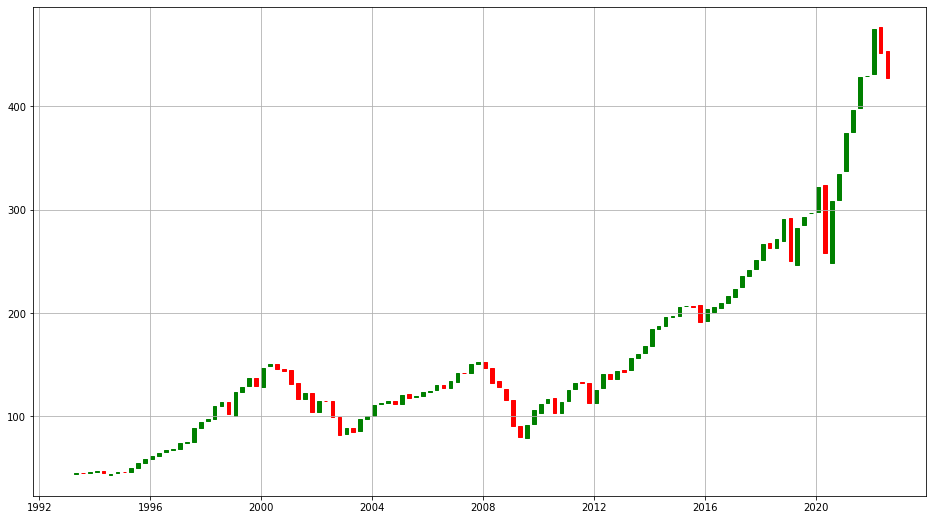

In [5]:
(df
 .groupby(pd.Grouper(freq = 'q'))
 .agg(Open = ('Open','first'), 
      High = ('High','max'), 
      Low = ('Low','min'), 
      Close = ('Close','last'))
 .tail(4*3*10)
 .pipe(lambda x: candle_plotter(x, logy=False))
)

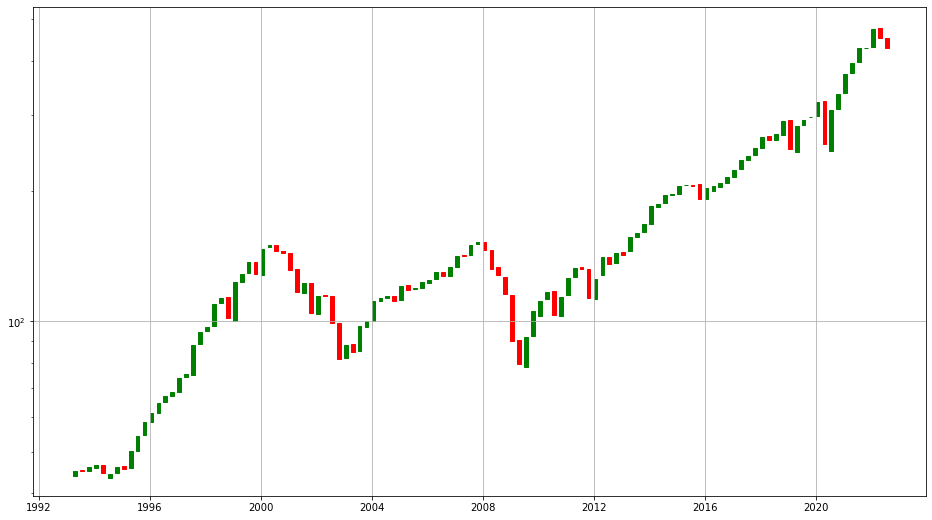

In [6]:
(df
 .groupby(pd.Grouper(freq = 'q'))
 .agg(Open = ('Open','first'), 
      High = ('High','max'), 
      Low = ('Low','min'), 
      Close = ('Close','last'))
 .tail(4*3*10)
 .pipe(lambda x: candle_plotter(x, logy=True))
)